In [1]:
# Importing libraries

import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [2]:
# Creating a copy of the dataset containing jobs from India

df_India = df[df['job_country'] =='India'].copy()

In [3]:
# Creating month column

df_India['job_posted_month'] = df_India['job_posted_date'].dt.strftime('%B')
df_India

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
16,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-06-15 13:28:03,False,False,India,None,NaN,NaN,Hexaware Technologies,"['powershell', 'python', 'sql', 'mysql', 'sql ...","{'cloud': ['databricks', 'azure'], 'databases'...",June
19,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Indeed,Full-time,False,India,2023-04-26 13:20:12,False,False,India,None,NaN,NaN,Bitwise Solutions,"['r', 'sql', 'python', 'scala', 'java', 'c++',...","{'analyst_tools': ['tableau'], 'libraries': ['...",April
29,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Exusia,Full-time,False,India,2023-03-26 13:16:20,False,False,India,None,NaN,NaN,Exusia,None,None,March
38,Data Analyst,Data Quality and Governance Analyst 1,India,via Trabajo.org,Full-time,False,India,2023-07-23 13:24:57,False,False,India,None,NaN,NaN,"Jones Lang LaSalle IP, Inc","['sql', 'python', 'databricks', 'power bi', 'e...","{'analyst_tools': ['power bi', 'excel', 'word'...",July
42,Senior Data Engineer,"Senior Data Engineer(Python)-1563,1637&1633","Chennai, Tamil Nadu, India",via HR Software For Growing Businesses | Fresh...,Full-time,False,India,2023-11-10 13:30:41,True,False,India,None,NaN,NaN,CESIT,"['python', 'sql', 'aws', 'pyspark', 'docker', ...","{'async': ['jira'], 'cloud': ['aws'], 'librari...",November
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785712,Data Engineer,India - Collections Analyst II,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,Varite India Private Limited,"['excel', 'flow']","{'analyst_tools': ['excel'], 'other': ['flow']}",March
785715,Data Analyst,Amul Careers 2023 - Apply Online - Data Analys...,India,melalui Jobsleworld - Jobs In India - Job Vaca...,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Amul,None,None,March
785716,Software Engineer,Application Support Analyst,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,CompuGroup Medical,"['c#', 'sql']","{'programming': ['c#', 'sql']}",March
785718,Business Analyst,Senior Performance QA Analyst,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Diebold Nixdorf,None,None,March


In [5]:
df_India_pivot = df_India.pivot_table(index ='job_posted_month',columns ='job_title_short',aggfunc ='size')

In [6]:
df_India_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
April,170,32,418,1566,946,54,86,375,194,169
August,189,25,618,1407,1157,47,126,343,235,148
December,186,27,648,1464,1206,94,77,343,200,133
February,143,35,433,1631,932,42,94,313,165,157
January,175,31,628,2132,1444,70,127,448,269,192
July,142,25,457,1528,1123,54,75,359,204,155
June,146,26,367,1632,1129,41,66,427,238,125
March,116,37,422,1591,1005,34,96,351,194,180
May,103,14,278,1384,837,31,59,329,134,98


In [7]:
# sort job_posted_month_name in df_India_pivot by job_posted_month value
df_India_pivot = df_India_pivot.reset_index()
df_India_pivot['job_posted_month_no'] = pd.to_datetime(df_India_pivot['job_posted_month'], format='%B').dt.month
df_India_pivot = df_India_pivot.sort_values('job_posted_month_no')
df_India_pivot = df_India_pivot.set_index('job_posted_month')
df_India_pivot = df_India_pivot.drop(columns='job_posted_month_no')

df_India_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,175,31,628,2132,1444,70,127,448,269,192
February,143,35,433,1631,932,42,94,313,165,157
March,116,37,422,1591,1005,34,96,351,194,180
April,170,32,418,1566,946,54,86,375,194,169
May,103,14,278,1384,837,31,59,329,134,98
June,146,26,367,1632,1129,41,66,427,238,125
July,142,25,457,1528,1123,54,75,359,204,155
August,189,25,618,1407,1157,47,126,343,235,148
September,155,34,630,1508,984,67,85,324,195,132


<Axes: xlabel='job_posted_month'>

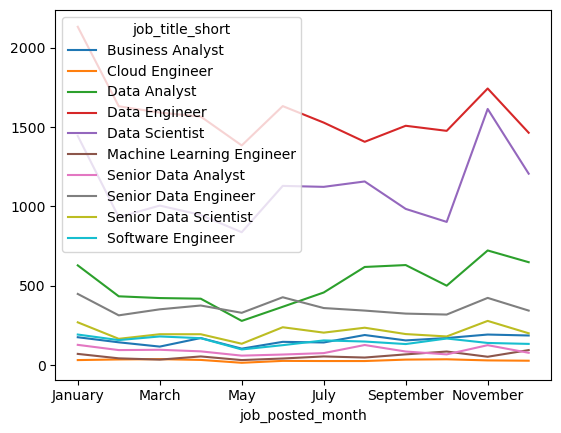

In [8]:
df_India_pivot.plot(kind='line')

In [11]:
top_3_jobs = df_India['job_title_short'].value_counts().head(3).index.to_list()
top_3_jobs

['Data Engineer', 'Data Scientist', 'Data Analyst']

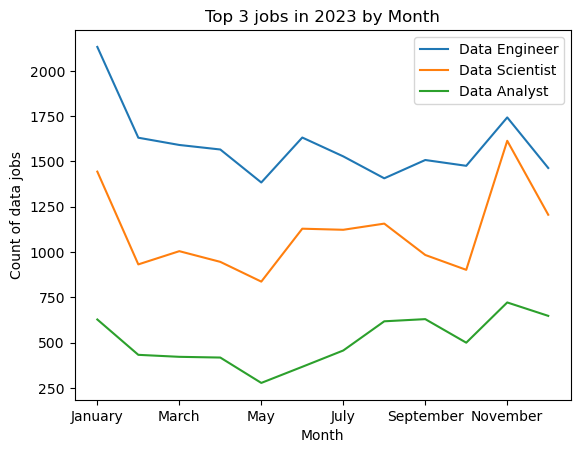

In [14]:
df_India_pivot[top_3_jobs].plot(kind='line')
plt.title('Top 3 jobs in 2023 by Month')
plt.xlabel('Month')
plt.ylabel('Count of data jobs')
plt.legend()